### **Wine Quality Prediction**

**Import the Libraries**

In [184]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.express as ps
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/wine-quality-dataset/WineQT.csv


**Load the Dataset**

In [185]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Understanding the data**

In [186]:
df.shape

(1143, 13)

In [187]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

Let us try to find out what these columns mean and how doo they contribute in determing the quality of the red wine!

**Fixed Acidity:** are non-volatile acids that do not evaporate readily

**Volatile Acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste

**Citric Acid:** acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

**Residual Sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

**Chlorides:** the amount of salt in the wine

**Free Sulfur Dioxide:** it prevents microbial growth and the oxidation of wine

**Total Sulfur Dioxide:** is the amount of free + bound forms of SO2

**Density:** sweeter wines have a higher density

**pH:** describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale
**Alcohol:** available in small quantities in wines makes the drinkers sociable

**Sulphates:** a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

**Quality:** which is the output variable/predictor


Drop the Id column.

In [188]:
df.drop('Id',axis=1,inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


There are no missing values in our dataset.

In [190]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


**A few Observations**
* The quality of wine varies between 3 to 8
* The alcohol content varies between 8.4 to 14.9
* Average density is 0.99
* pH varies between 2.7 to 4.01
* Total sulphur dioxide varies between 6 and 289

In [191]:
df.duplicated().sum()

125

In [192]:
df = df.drop_duplicates()

Now all the duplicates are removed.

Check the Target Column.

In [193]:
df["quality"].value_counts()

5    433
6    409
7    122
4     33
8     15
3      6
Name: quality, dtype: int64

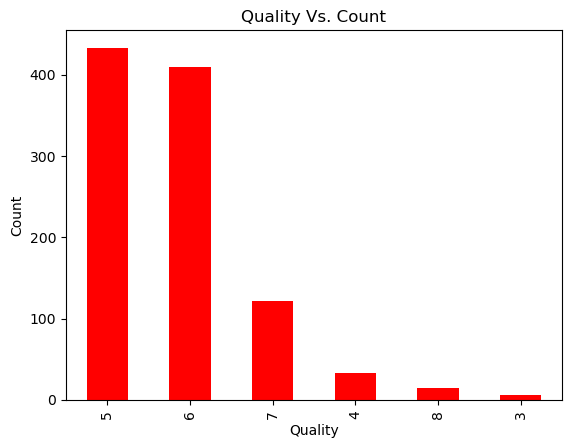

In [151]:
df["quality"].value_counts().plot(kind="bar",color="red")
plt.xlabel('Quality')
plt.ylabel("Count")
plt.title("Quality Vs. Count")
plt.show()

**Data imbalance**

The majority of the data corresponds to categories 5 and 6, indicating that the dataset is predominantly composed of wines of medium quality.
The dataset contains the lowest values for both the highest and the lowest categories.

**Check Correlation**

In [194]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.485953
sulphates               0.257519
citric acid             0.241565
fixed acidity           0.115826
residual sugar          0.022718
pH                     -0.057592
free sulfur dioxide    -0.071083
chlorides              -0.122214
total sulfur dioxide   -0.182214
density                -0.185187
volatile acidity       -0.409340
Name: quality, dtype: float64

<Axes: >

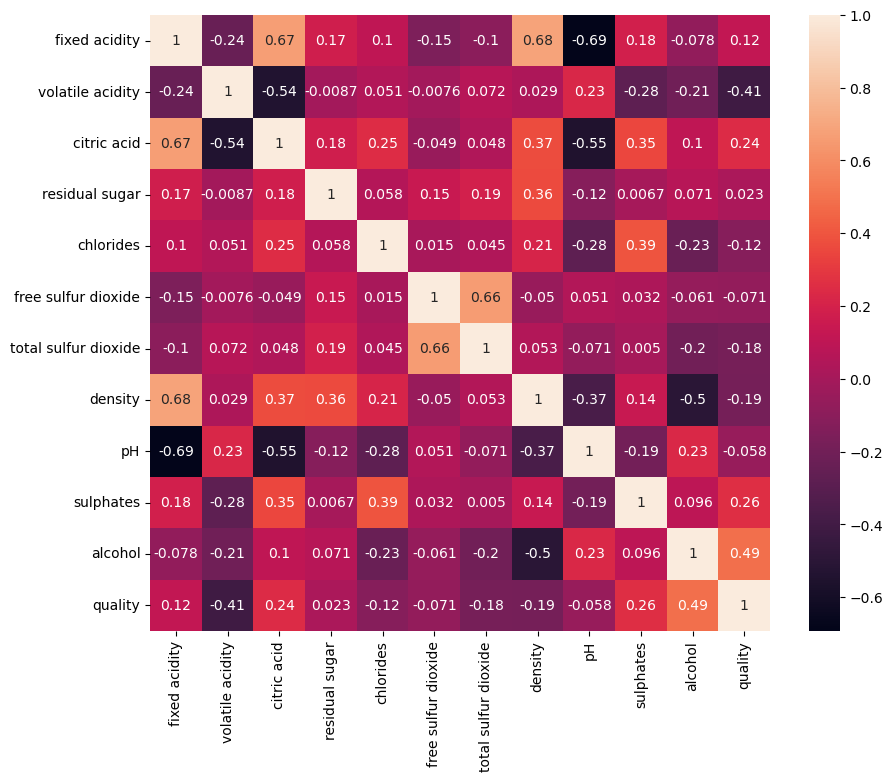

In [195]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

**Splitting the Data**

In [198]:
train,test = train_test_split(df,test_size=0.2,random_state=0,shuffle = True)

In [199]:
train.shape

(814, 12)

In [200]:
test.shape

(204, 12)

In [201]:
train['quality'].value_counts()

5    349
6    314
7    106
4     26
8     14
3      5
Name: quality, dtype: int64

In [202]:
df3 = train[train['quality'] == 3] #Minority
df4 = train[train['quality'] == 4] #Minority
df5 = train[train['quality'] == 5] #Majority
df6 = train[train['quality'] == 6] #Majority
df7 = train[train['quality'] == 7] #Minority
df8 = train[train['quality'] == 8] #Minority

In [203]:
#Oversample minority class to make baalnce data

from sklearn.utils import resample

df3_up = resample(df3, replace = True, n_samples = 300, random_state = 12)
df4_up = resample(df4, replace = True, n_samples = 300, random_state = 12)
df7_up = resample(df7, replace = True, n_samples = 300, random_state = 12)
df8_up = resample(df8, replace = True, n_samples = 300, random_state = 12)




In [204]:
#Decrease the rows of majority ones to make balanced data

df5_down = df5.sample(n=300).reset_index(drop=True)
df6_down = df6.sample(n=300).reset_index(drop=True)

In [205]:
#Concatenate the upsampled minority class with downsampled majority class

df_balanced = pd.concat([df3_up,df4_up,df5_down,df6_down,df7_up,df8_up]).reset_index(drop=True)

In [206]:
df_balanced

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
1,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
2,7.3,0.98,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
3,6.7,0.76,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
4,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.00,8
1796,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
1797,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.70,8
1798,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.00,8


<Axes: >

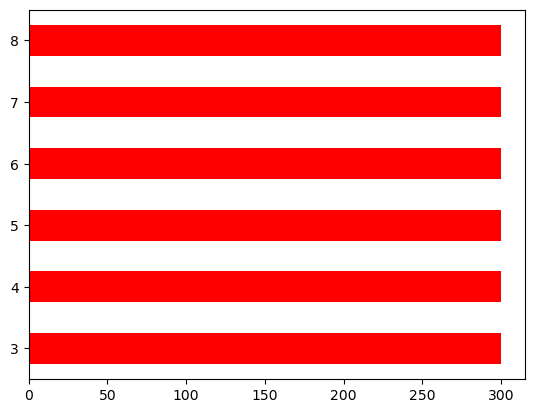

In [207]:
df_balanced['quality'].value_counts().plot(kind='barh',color = 'red')

In [208]:
X = df_balanced.drop('quality',axis=1)
y = df_balanced['quality']

In [209]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=1)

In [210]:
X_test = test.drop('quality',axis=1)
y_test = test['quality']

**Scaling the features**

In [211]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

**Model Building**

**KNeighborsClassifier**

In [212]:
for n in [3,5,7,9,11]:
    knn = KNeighborsClassifier(n_neighbors = n, weights = 'distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_val)
    print(" For Neighbors =",n, "Accuracy =",accuracy_score(y_val,y_pred)*100)

 For Neighbors = 3 Accuracy = 82.22222222222221
 For Neighbors = 5 Accuracy = 80.18518518518518
 For Neighbors = 7 Accuracy = 81.2962962962963
 For Neighbors = 9 Accuracy = 79.44444444444444
 For Neighbors = 11 Accuracy = 79.25925925925927


**Hyper Parameter Tuning**

In [213]:
params = {'n_neighbors' : [3,5,7,9,11],'weights' : ['uniform','distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

In [214]:
clf = GridSearchCV(knn,params,cv=5,scoring='precision')
clf.fit(X_train,y_train)


clf.best_params_

In [216]:
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 3, weights = 'uniform')
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        92
           4       0.85      1.00      0.92        81
           5       0.62      0.53      0.57        96
           6       0.47      0.43      0.45        87
           7       0.79      0.83      0.81        98
           8       0.96      1.00      0.98        86

    accuracy                           0.79       540
   macro avg       0.78      0.80      0.79       540
weighted avg       0.78      0.79      0.78       540



**Prediction on Test Data - KNN**

In [217]:
y_pred_actual = knn.predict(X_test)
print("Accuracy =",accuracy_score(y_test,y_pred_actual)*100)
print(classification_report(y_test,y_pred_actual))

Accuracy = 46.568627450980394
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.65      0.56      0.60        84
           6       0.58      0.44      0.50        95
           7       0.24      0.38      0.29        16
           8       0.00      0.00      0.00         1

    accuracy                           0.47       204
   macro avg       0.24      0.23      0.23       204
weighted avg       0.56      0.47      0.50       204



**RandomForestClassifier**

In [218]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_val)
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        92
           4       0.98      1.00      0.99        81
           5       0.69      0.61      0.65        96
           6       0.53      0.52      0.52        87
           7       0.84      0.94      0.89        98
           8       1.00      1.00      1.00        86

    accuracy                           0.84       540
   macro avg       0.84      0.85      0.84       540
weighted avg       0.84      0.84      0.84       540



**Hyper Parameter Tuning - RandomForestClassifier**

In [219]:
params = {'n_estimators' : [100,150,200,300] , 'criterion' : ['gini', 'entropy', 'log_loss']}

clf = GridSearchCV(rf , params, cv=5, scoring = 'precision')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='precision')

In [220]:
clf.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [237]:
rf = RandomForestClassifier(criterion = 'gini', n_estimators = 100)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_val)
print(classification_report(y_val,y_pred_rf))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00        92
           4       0.98      1.00      0.99        81
           5       0.66      0.55      0.60        96
           6       0.52      0.56      0.54        87
           7       0.88      0.94      0.91        98
           8       1.00      1.00      1.00        86

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.84      0.84      0.84       540



**Prediction on Actual Test Data - RF**

In [238]:
y_pred_rf_actual = rf.predict(X_test)
print("Accuracy =",accuracy_score(y_test,y_pred_rf_actual)*100)
print(classification_report(y_test,y_pred_rf_actual))

Accuracy = 59.31372549019608
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.67      0.70      0.69        84
           6       0.63      0.56      0.59        95
           7       0.36      0.56      0.44        16
           8       0.00      0.00      0.00         1

    accuracy                           0.59       204
   macro avg       0.28      0.30      0.29       204
weighted avg       0.60      0.59      0.59       204



**Conclusion**

The model RandomForestClassifier is giving 84% accuracy and good precision in the training dataset. But the accuracy is only 60% for test dataset.